In [30]:
import numpy as np
import pandas as pn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pn.read_csv('/home/rahmat/Desktop/Data csv file for ML/LRMV.csv')
df.head()

,area,bedrooms,age,price
0,2600,3,20,550000
1,3000,4,15,565000
2,3200,3,18,610000
3,3400,5,25,650000


In [4]:
x = df[['area','bedrooms','age']].values
Y = df['price'].values

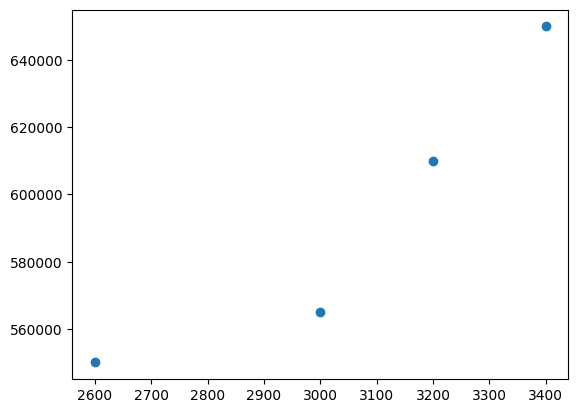

In [6]:
plt.scatter(df['area'],Y)
plt.show()

In [31]:
x1 = df['area'].values
x1s=x1/np.max(x1)
x2 = df['bedrooms'].values
x2s=x1/np.max(x1)
x3 = df['age'].values
x3s=x1/np.max(x1)
x0 = np.ones(len(x))
theta = np.array([0,0,0,0])
X = np.array([x0,x1s,x2s,x3s]).T

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=15)


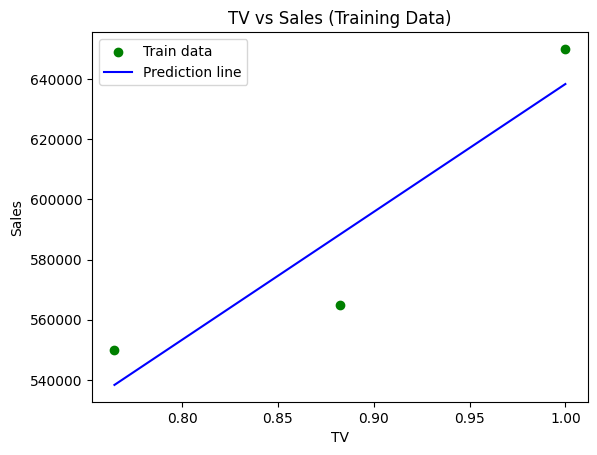

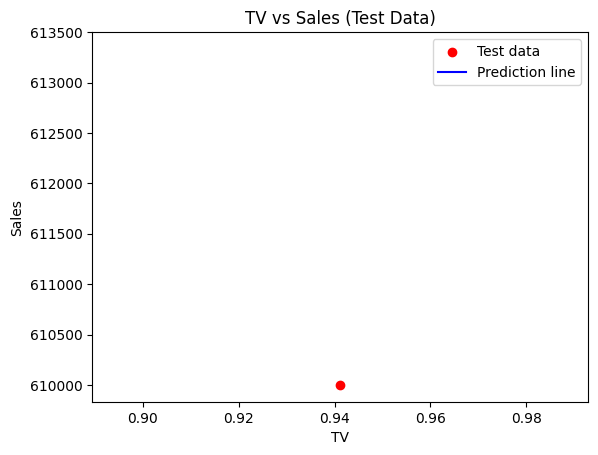

In [33]:
x_transpose = X_train.T
x_inverse = np.linalg.pinv(x_transpose.dot(X_train))
x_transpose_y = x_transpose.dot(Y_train)
normal_equation = x_inverse.dot(x_transpose_y)

Y_pred = X_test.dot(normal_equation)
Y_p = X_train.dot(normal_equation)

plt.scatter(X_train[:,1], Y_train, color='green', label='Train data')
plt.plot(X_train[:,1], Y_p, color='blue', label='Prediction line')
plt.title("TV vs Sales (Training Data)")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.legend()
plt.show()

# Visualization
plt.scatter(X_test[:,1], Y_test, color='red', label='Test data')
plt.plot(X_test[:,1], Y_pred, color='blue', label='Prediction line')
plt.title("TV vs Sales (Test Data)")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.legend()
plt.show()



In [20]:
def compute_cost(X, Y, theta):
    m = len(Y)
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions - Y))
    return cost

def gradient_descent(X, Y, theta, alpha, num_iters):
    m = len(Y)
    cost_history = np.zeros(num_iters)
    
    for i in range(num_iters):
        predictions = X.dot(theta)
        theta = theta - (1/m) * alpha * (X.T.dot(predictions - Y))
        cost_history[i] = compute_cost(X, Y, theta)
        
    return theta, cost_history

In [38]:
alpha = 0.0001
num_iters = 1000000
theta, cost_history = gradient_descent(X_train, Y_train, theta, alpha, num_iters)

print("Theta (parameters):", theta)
print("Final cost:", cost_history[-1])

Theta (parameters): [206601.8819326  144188.67796616 144188.67796616 144188.67796616]
Final cost: 1227390830.2569087


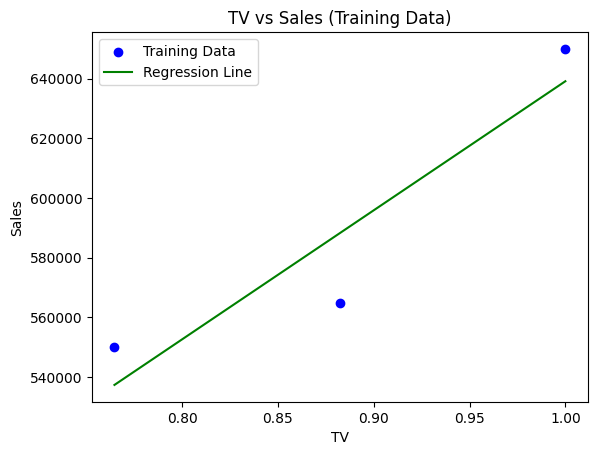

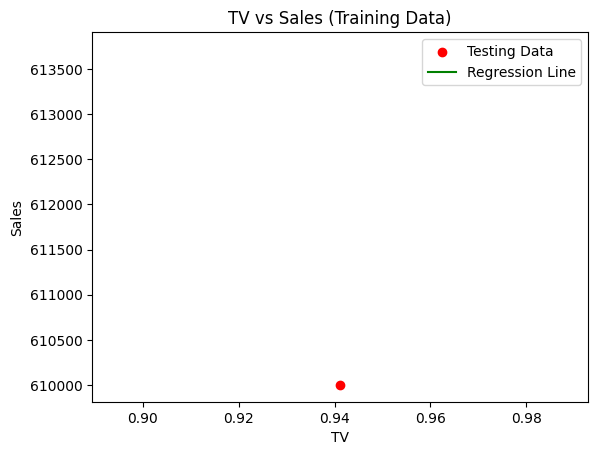

In [39]:
h_theta = X_train.dot(theta) 
h_theta_te = X_test.dot(theta) 

# Plot the training data
plt.scatter(X_train[:, 1], Y_train, color='blue', label='Training Data')
plt.plot(X_train[:,1], h_theta, color='green', label='Regression Line')
plt.title("TV vs Sales (Training Data)")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.legend()
plt.show()

# Plot the testing data
plt.scatter(X_test[:, 1], Y_test, color='red', label='Testing Data')
plt.plot(X_test[:,1], h_theta_te, color='green', label='Regression Line')
plt.title("TV vs Sales (Training Data)")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.legend()
plt.show()

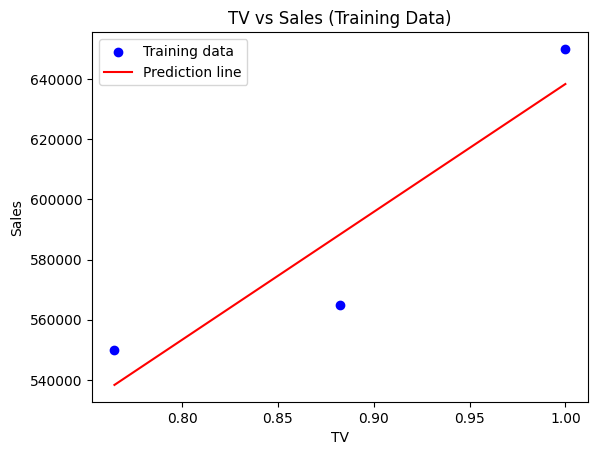

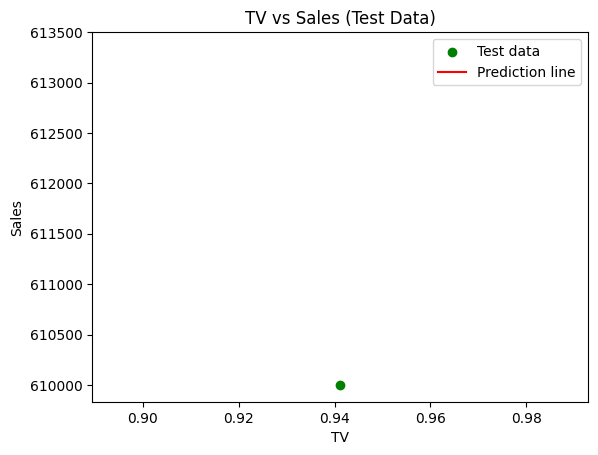

In [42]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)
# plt.scatter(X_train, Y_train)


Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

# Plotting the results for the training set
plt.scatter(X_train[:,1], Y_train, color='blue', label='Training data')
plt.plot(X_train[:,1], Y_train_pred, color='red', label='Prediction line')
plt.title("TV vs Sales (Training Data)")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.legend()
plt.show()

# Plotting the results for the test set
plt.scatter(X_test[:,1], Y_test, color='green', label='Test data')
plt.plot(X_test[:,1], Y_test_pred, color='red', label='Prediction line')
plt.title("TV vs Sales (Test Data)")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.legend()
plt.show()